In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'D:\Smart Fertilizer Recommendation System\data\data_core.csv')

Load Dataset

In [3]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,Sandy,Maize,37,0,0,Urea
1,29.0,52.0,45.0,Loamy,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,Black,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,Red,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,Clayey,Paddy,35,0,0,Urea


In [4]:
df.shape

(8000, 9)

Data Inception

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   object 
 4   Crop Type        8000 non-null   object 
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   object 
dtypes: float64(3), int64(3), object(3)
memory usage: 562.6+ KB


In [6]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [7]:
df['Fertilizer Name'].value_counts()

Fertilizer Name
14-35-14    1188
Urea        1170
DAP         1167
10-26-26    1128
17-17-17    1124
28-28       1120
20-20       1103
Name: count, dtype: int64

Visualization

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

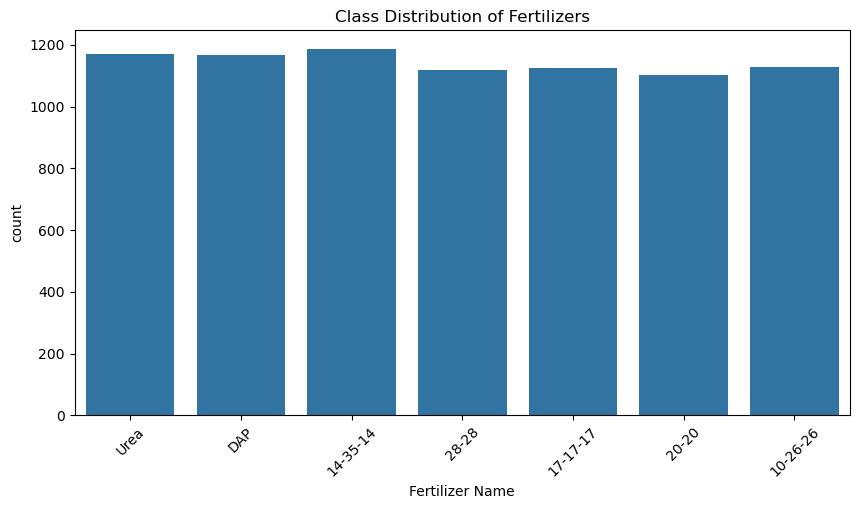

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Fertilizer Name')
plt.title("Class Distribution of Fertilizers")
plt.xticks(rotation=45)
plt.show()


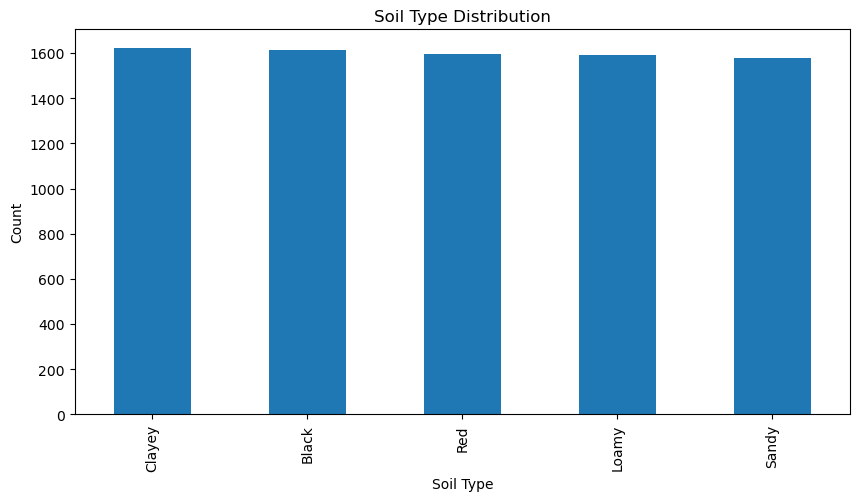

In [10]:
df['Soil Type'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title("Soil Type Distribution")
plt.xlabel("Soil Type")
plt.ylabel("Count")
plt.show()

Preprocessing

In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [12]:
le_soil = LabelEncoder()
df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])

In [13]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,4,Maize,37,0,0,Urea
1,29.0,52.0,45.0,2,Sugarcane,12,0,36,DAP
2,34.0,65.0,62.0,0,Cotton,7,9,30,14-35-14
3,32.0,62.0,34.0,3,Tobacco,22,0,20,28-28
4,28.0,54.0,46.0,1,Paddy,35,0,0,Urea


In [14]:
le_crop = LabelEncoder()
df['Crop Type'] = le_crop.fit_transform(df['Crop Type'])


In [15]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,4,3,37,0,0,Urea
1,29.0,52.0,45.0,2,8,12,0,36,DAP
2,34.0,65.0,62.0,0,1,7,9,30,14-35-14
3,32.0,62.0,34.0,3,9,22,0,20,28-28
4,28.0,54.0,46.0,1,6,35,0,0,Urea


In [16]:
le_fertilizer = LabelEncoder()
df['Fertilizer Name'] = le_fertilizer.fit_transform(df['Fertilizer Name'])

In [17]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,4,3,37,0,0,6
1,29.0,52.0,45.0,2,8,12,0,36,5
2,34.0,65.0,62.0,0,1,7,9,30,1
3,32.0,62.0,34.0,3,9,22,0,20,4
4,28.0,54.0,46.0,1,6,35,0,0,6


In [18]:
import joblib
import os

In [19]:
os.makedirs('models', exist_ok=True)

joblib.dump(le_soil, r'models\le_soil.pkl')

['models\\le_soil.pkl']

In [ ]:
joblib.dump(le_crop, r'models\le_crop.pkl')

['models\\le_crop.pkl']

In [21]:
joblib.dump(le_fertilizer, r'models\le_fertilzer.pkl')

['models\\le_fertilzer.pkl']

Split Feature and Labels

In [28]:
from sklearn.model_selection import  train_test_split , GridSearchCV
from sklearn.preprocessing import StandardScaler

In [26]:
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, r'models\scaler.pkl')

['models\\scaler.pkl']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Taining by random forest model

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=42)


In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

In [37]:
y_pred = rf.predict(X_test)

In [40]:
print("Predictions:", y_pred)

Predictions: [2 2 6 ... 4 5 1]


In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [42]:
print("Random Forrest Accuracy:", accuracy_score(y_test, y_pred))

Random Forrest Accuracy: 0.1375


In [44]:
from xgboost import XGBClassifier


In [49]:
xgb = XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=5, use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

c:\Users\Anand B Patil\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:44:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.14375
              precision    recall  f1-score   support

           0       0.17      0.17      0.17       241
           1       0.16      0.13      0.15       241
           2       0.13      0.11      0.12       215
           3       0.13      0.12      0.13       236
           4       0.12      0.11      0.11       219
           5       0.15      0.18      0.17       239
           6       0.14      0.17      0.15       209

    accuracy                           0.14      1600
   macro avg       0.14      0.14      0.14      1600
weighted avg       0.14      0.14      0.14      1600



In [46]:
df['Fertilizer Name'].value_counts(normalize=True) * 100


Fertilizer Name
1    14.8500
6    14.6250
5    14.5875
0    14.1000
2    14.0500
4    14.0000
3    13.7875
Name: proportion, dtype: float64

In [48]:
print("Encoded Fertilizer Classes:", le_fertilizer.classes_)


Encoded Fertilizer Classes: ['10-26-26' '14-35-14' '17-17-17' '20-20' '28-28' 'DAP' 'Urea']


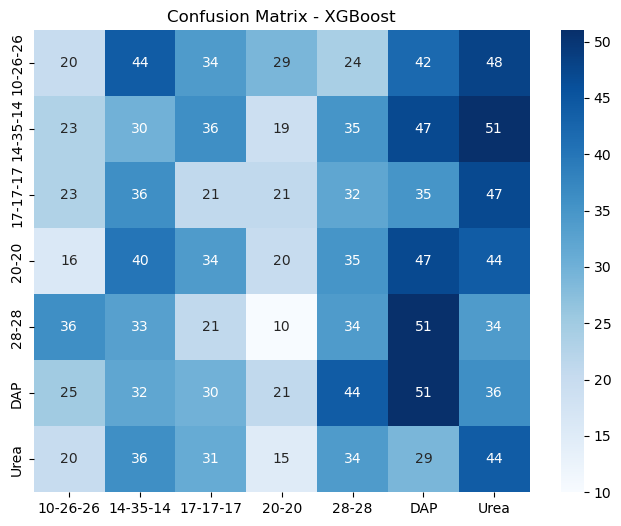

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le_fertilizer.classes_,
            yticklabels=le_fertilizer.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.show()


c:\Users\Anand B Patil\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:48:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost Accuracy: 0.1400

Classification Report:


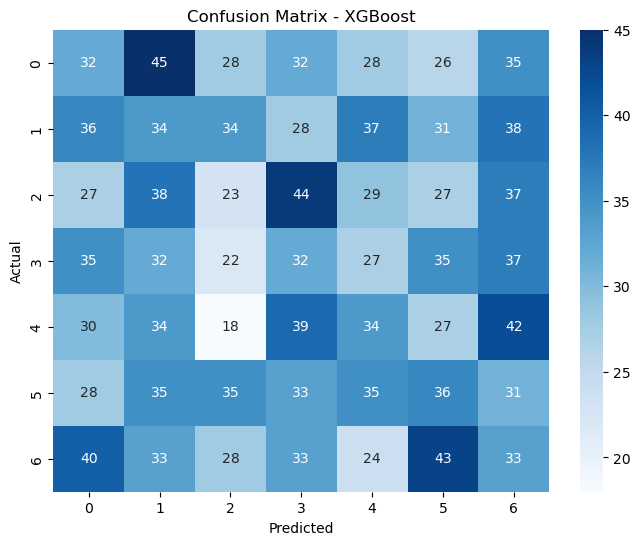

In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Label encoding
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fert = LabelEncoder()

df['Soil Type'] = le_soil.fit_transform(df['Soil Type'])
df['Crop Type'] = le_crop.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = le_fert.fit_transform(df['Fertilizer Name'])

X = df.drop("Fertilizer Name", axis=1)
y = df["Fertilizer Name"]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Train XGBoost
xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# Results
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ XGBoost Accuracy: {accuracy:.4f}")

print("\nClassification Report:")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le_fert.classes_,
            yticklabels=le_fert.classes_,
            cmap="Blues")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
